## Iris dataset experimentation
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

In [23]:
# Step 1: Import Necessary Libraries
# Import libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 0, download the data, could also be found at https://www.kaggle.com/datasets/uciml/iris
# Once this cell has been run, the below code could be deleted safely
from sklearn import datasets
# Load the IRIS dataset and print to csv
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df.to_csv('iris.csv', index=False)
del iris_df

In [24]:
# Step 2: Load the IRIS Dataset
# Load the IRIS dataset from a CSV file (hint, use the pandas read_csv function)
# Create a DataFrame from the dataset

iris_df = pd.read_csv('iris.csv')
iris_df.head() # Display the first 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Step 3: Explore the Data

Get basic information and statistics about the dataset
- Use `.head()` to view the first few rows of the dataset
- Use `.info()` to understand the structure of the dataset (e.g., data types, missing values)
- Use `.describe()` to get summary statistics for each feature
- Use `iris_df["<col_name>"]` or `iris_df.col_name` to get a specific column of data (called a series in pandas)
  
Visualization
- Visualize the data using scatter plots to understand relationships between features
- Use matplotlib scatter plots to visualize relationships between specific features

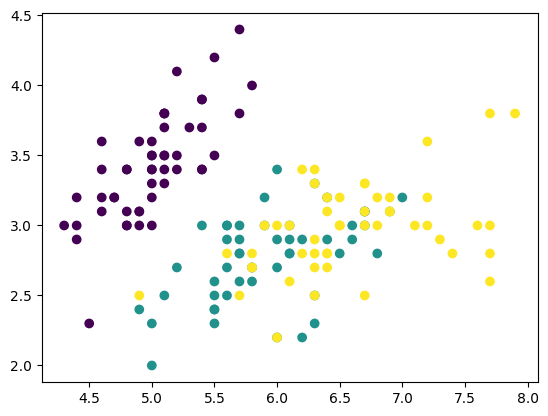

In [25]:
# TODO: create plots of each features vs each other, colored by species. For instance, 
# this is a plot of sepal length vs sepal width:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c=iris_df['species'])

TODO: replace this cell with a *short* explanation of what you see in the plots. Be ready to expand when presenting. Example explanations might be the easiest species to differentiate, and which variables are best used for each species

### Step 4: Preprocess the Data
- Split the dataset into features and target. 
- Split the dataset into training and testing sets
- Standard practice is to have X as capital (bc its a matrix), whereas y is lowercase, meaning its a vector

X shape: (150, 4), y shape: (150,)


/var/folders/yc/3v9hm3510g9f40pgdmy7m66r0000gn/T/ipykernel_98733/3668625435.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train.values, labels=X.columns, vert=False)
/var/folders/yc/3v9hm3510g9f40pgdmy7m66r0000gn/T/ipykernel_98733/3668625435.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train_scaled, labels=X.columns, vert=False)


Text(0.5, 0, 'Value Range')

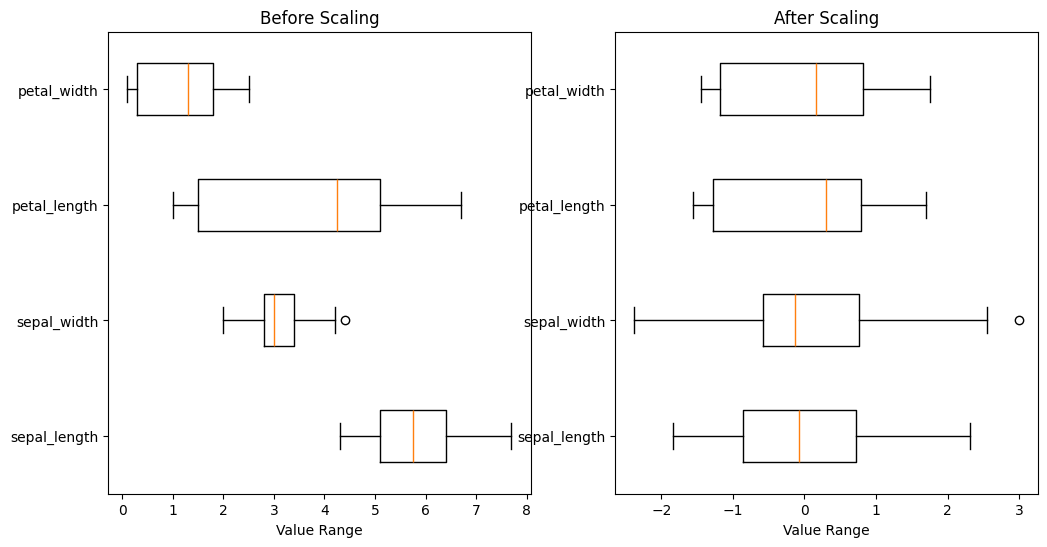

In [26]:
X = iris_df.iloc[:, :-1] #TODO (hint: features are all columns except the last one)
y = iris_df.iloc[:, -1] #TODO (hint: species is likely the last column)
print(f'X shape: {X.shape}, y shape: {y.shape}')

# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features can be helpful for some models. This can be done manually, 
# or using StandardScaler from sklearn
# TODO print some of the above explored graphs from section 3 before and after scaling to see the difference

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(X_train.values, labels=X.columns, vert=False)
plt.title("Before Scaling")
plt.xlabel("Value Range")

plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled, labels=X.columns, vert=False)
plt.title("After Scaling")
plt.xlabel("Value Range")

#Scaling just converts everything into something between 0 and 1 but keeps the relative distance between, this allows for things to change


### Step 5: Train and evaluate the model

#### Train

In [27]:
# Use Logistic Regression to classify the flowers based on their features
# TODO: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)  #not sure sure what is happening here... Ask!

LogisticRegression()

#### Evaluate

In [28]:
# Make predictions on the test set
# TODO: Make predictions
y_pred = model.predict(X_test)
y_true = y_test#TODO (hint, what is the true value of y that we're testing against?)

# Print accuracy, confusion matrix, and classification report to evaluate model performance
# TODO: Evaluate the model

conf_matrix = confusion_matrix(y_true, y_pred) #confusion_matrix is just something we are given? what other matrices do we have access to?


print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



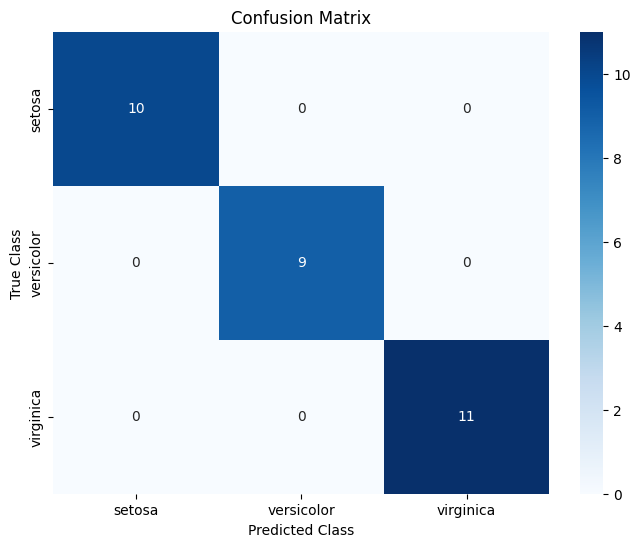

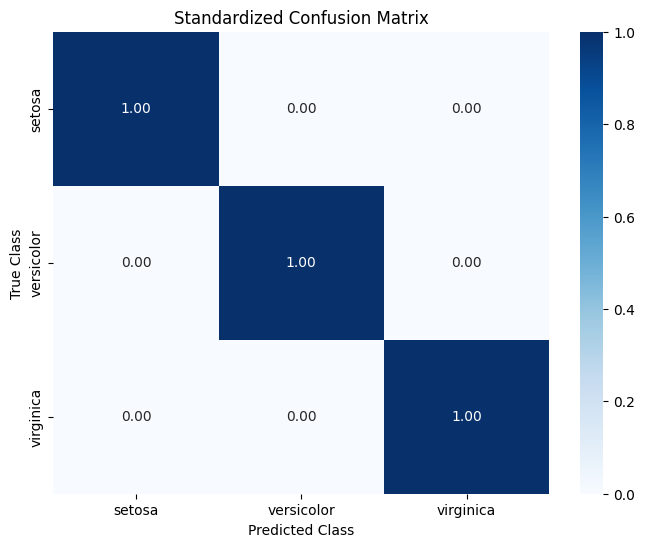

In [29]:
#TODO use sns.heatplot to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

conf_matrix_standardized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_standardized, annot=True, fmt='.2f', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Standardized Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#TODO standardize the values in the confusion matrix so that each row sums to 1
# standardizing the confusion matrix allows us to see the ratio of correct and 
# incorrect predictions for each class as a percentage. Reminder to read the 
# Confusion Matrix article for more information

TODO: Replace this cell with a short explanation of how to interpret the confusion matrix in context

### Step 6: Repeat with a model of your choice
KMeans, KNN, or Random Forest (all from sklearn) all good starting points - feel free to go wild tho

In [ ]:
# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train) #same question as in step5

RandomForestClassifier(random_state=42)

In [ ]:
# Test

y_pred_rf = rf_model.predict(X_test_scaled)
y_true_rf = y_test #where is this prediction coming from exactly?

accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_true_rf, y_pred_rf)
class_report_rf = classification_report(y_true_rf, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)




Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



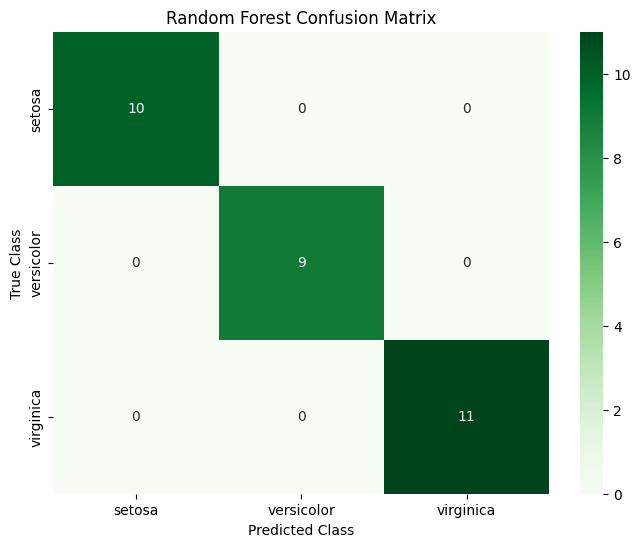

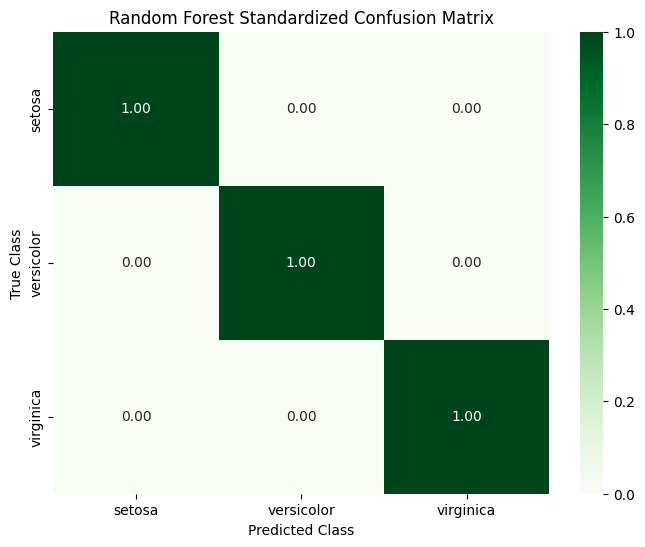

In [32]:
# Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

conf_matrix_rf_standardized = conf_matrix_rf.astype('float') / conf_matrix_rf.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_standardized, annot=True, fmt='.2f', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest Standardized Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

TODO: Replace this cell with a short explanation of how to interpret the confusion matrix in context

### Step 7: Conclusion and Next Steps
Do the below steps, with a focus on THINKING through the results, writing them is not fully necessary. Be ready to explain your thinking however
- Discuss the accuracy and performance of the two models
    The accuracy seems to  be the same for both, both models got 100% accuracy.
- Discuss model performance
    Looks like both ran in less than a second on my machine, probably is a difference but not measurable for me right now
- Provide suggestions for improvement or extensions, such as trying different algorithms or hyperparameter tuning
    Make the UI a bit more readable, and more general understand more of whats happening 

TODO: discussion